# Collect data frames from all participants and analyse them

In [2]:
import os #for interacting with the operating system - for example reading files from our computer 
import glob  #module finds all the pathnames matching a specified pattern according to the rules used by the Unix shell
import numpy as np #module for using mathematical and numerical functions 
import pandas as pd #library for data analysis
import matplotlib.pyplot as plt #for generating boxplots 
import seaborn as sns  #another data visualization library based on matplotlib
from sklearn.manifold import TSNE #for generating a t-distributed stochastic neighbor embedding (t-SNE) plot

In [3]:
#! pip list 

In [4]:
in_directory = './dataframes/' #the directory where all the zip files are stored, containing the measured characteristics of the voice 

**-Create a collective data frame with all the zip files from folder**

In [5]:
if not os.path.isfile('all_participants_data.pkl'):

    df = pd.DataFrame()
    for file in glob.glob(in_directory+'*.pkl'):
        print(file)
        df_tmp = pd.read_pickle(file)
        df = df.append(df_tmp)
    df.to_pickle('all_participants_data.pkl')
else:
    df = pd.read_pickle('all_participants_data.pkl')

**-Discretize valence** - sometimes you may have a quantitative variable in your data set and you might want to discretize it or bin it or categorize it based on the values of the variable. In our case, we discretize the values of the valence with borders of 3 and 4 (this means, that the segments with valence higher than 3 will get the value 1 and the segments with valence lower than or equal to 3 will get the value 0 - second column in the dataframe)

In [6]:
df. insert(1, 'val_bin', -1)
df['val_bin'] = np.digitize (df.valence.values, [0,4,6])-1

In [7]:
#df.shape

In [25]:
df.head()

,valence,val_bin,speaker,sex,duration,meanF0Hz,stdevF0Hz,HNR,localJitter,localabsoluteJitter,...,f4_median,pF,fdisp,avgFormant,mff,fitch_vtl,delta_f,vtl_delta_f,JitterPCA,ShimmerPCA
file,,,,,,,,,,,,,,,,,,,,,
Angehelescu_16_seg_00000000.wav,4.0,1,irina,female,4.28,253.775735,21.862605,9.477288,0.020626,0.000081,...,3890.653335,0.034499,1128.602727,2189.947411,1724.099350,16.258670,1100.541549,15.901262,-0.006636,-0.001238
Angehelescu_16_seg_00000001.wav,4.0,1,irina,female,5.96,230.974964,39.822558,9.240131,0.024346,0.000106,...,3865.271638,0.197979,1096.403603,2208.987168,1788.838185,15.664861,1099.272751,15.919616,-0.006636,-0.001238
Angehelescu_16_seg_00000002.wav,4.0,1,irina,female,6.96,217.720590,40.656277,11.302664,0.017945,0.000082,...,3863.210498,-0.734963,1124.081020,2132.891562,1672.220935,16.765487,1076.734110,16.252852,-0.006636,-0.001238
Angehelescu_16_seg_00000003.wav,4.0,1,irina,female,6.96,223.013685,40.045658,10.033796,0.016122,0.000072,...,3889.489510,0.230677,1098.321195,2211.255038,1798.267563,15.587988,1100.690985,15.899104,-0.006636,-0.001238
Angehelescu_16_seg_00000004.wav,3.0,0,irina,female,1.66,232.001187,25.032989,14.639509,0.014489,0.000063,...,3878.346306,0.210506,1122.512046,2203.411591,1740.302593,16.106597,1104.395672,15.845770,-0.006636,-0.001238


In [9]:
df.speaker.unique()

array(['irina', 'felix', 'lena', 'luise', 'saskia', 'lea', 'alicia',
       'nina', 'jannis', 'Carolin-Antonia', 'sophie', 'lisa', 'tobias'],
      dtype=object)

**-Analyse the data with different visualizations - valence**

Standard/default visualization

<AxesSubplot:>

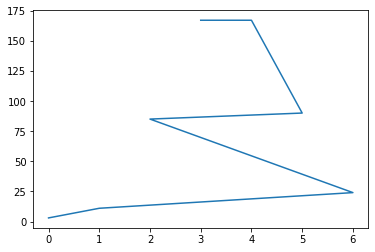

In [18]:
df.valence.value_counts().plot()

Bar diagram

<AxesSubplot:>

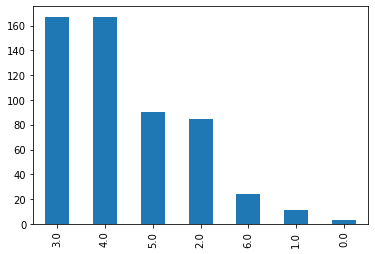

In [11]:
df.valence.value_counts().plot(kind='bar')

Pie chart

<AxesSubplot:ylabel='valence'>

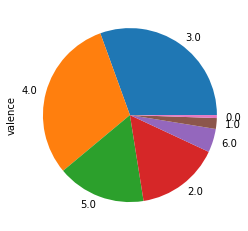

In [12]:
df.valence.value_counts().plot(kind='pie')

**-Analyse the data with boxplots**

Correlation between sex and fundamental frequency - it turns out that women have in average higher fundamental frequency than men; this can also be applied to the entire population

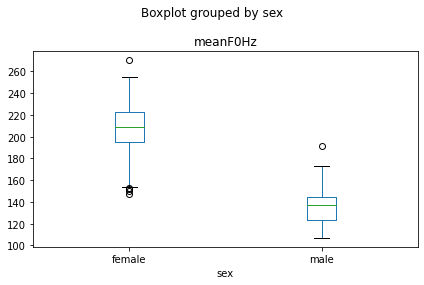

In [13]:
df.boxplot(by ='sex', column = 'meanF0Hz', grid = False)
plt.tight_layout() 

Correlation between sex and valence - there is no significant correlation, the valence of the segments is not dependent on the sex 

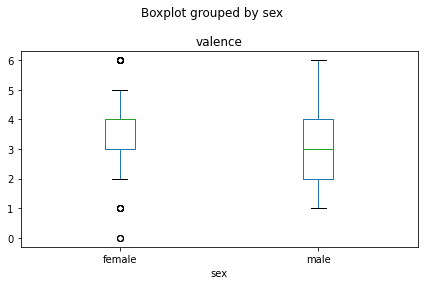

In [19]:
df.boxplot(by ='sex', column = 'valence', grid = False)
plt.tight_layout() 

Correlation between fundamental frequency and valence - here you can see the tendency that the higher the basic frequency becomes, the higher the valence of the segment is, i.e. it has a more positive effect (higher value on the scale)

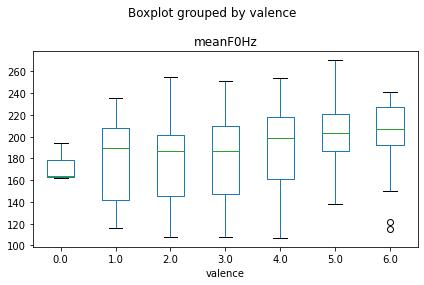

In [21]:
df.boxplot(by ='valence', column = 'meanF0Hz', grid = False)
plt.tight_layout() 

**-Replace NANs with mean value**

In [14]:
for i, col in enumerate(df.iloc[:,4:].columns):
    print(i)
    print(col)
    if np.isnan(df[col]).any():
        print()
        print('{} includes {} nan, I\'ll insert mean values'.format(col,df[col].isna().sum())) #removing the "nan" values
        df[col] = df[col].fillna(df[col].mean())
        


0
duration

duration includes 61 nan, I'll insert mean values
1
meanF0Hz

meanF0Hz includes 61 nan, I'll insert mean values
2
stdevF0Hz

stdevF0Hz includes 61 nan, I'll insert mean values
3
HNR

HNR includes 61 nan, I'll insert mean values
4
localJitter

localJitter includes 61 nan, I'll insert mean values
5
localabsoluteJitter

localabsoluteJitter includes 61 nan, I'll insert mean values
6
rapJitter

rapJitter includes 61 nan, I'll insert mean values
7
ppq5Jitter

ppq5Jitter includes 61 nan, I'll insert mean values
8
ddpJitter

ddpJitter includes 61 nan, I'll insert mean values
9
localShimmer

localShimmer includes 61 nan, I'll insert mean values
10
localdbShimmer

localdbShimmer includes 61 nan, I'll insert mean values
11
apq3Shimmer

apq3Shimmer includes 62 nan, I'll insert mean values
12
apq5Shimmer

apq5Shimmer includes 62 nan, I'll insert mean values
13
apq11Shimmer

apq11Shimmer includes 64 nan, I'll insert mean values
14
ddaShimmer

ddaShimmer includes 62 nan, I'll insert mean 

In [15]:
#df.duration

**-Make a t-SNE plot** - A t-SNE plot is a very useful visualization, as it condenses the feature space into two dimensions (so it can be plotted) and then uses colors to represent the class membership. 

c:\users\user\s_sprechstile\s_sprechstile\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


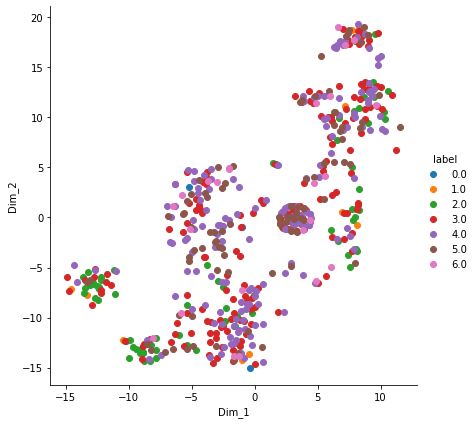

In [16]:
# Plot a TSNE
def plotTsne(feats, labels, perplexity=30, learning_rate=200):
    model = TSNE(n_components=2, random_state=0, perplexity=perplexity, learning_rate=learning_rate)
    tsne_data = model.fit_transform(feats)
    tsne_data_labs = np.vstack((tsne_data.T, labels)).T
    tsne_df = pd.DataFrame(data=tsne_data_labs, columns=('Dim_1', 'Dim_2', 'label'))
    sns.FacetGrid(tsne_df, hue='label', size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
    plt.show()
    
plotTsne(df.iloc[:,4:], df['valence'], 60, 200)